In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats

In [3]:
df = pd.read_excel("../../데이터수집/data/일별_금은달러.xlsx")
df

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7
5,2020.07.31,75628.90,24.19,1191.0
6,2020.07.30,75110.59,23.34,1196.0
7,2020.07.29,75110.45,24.30,1194.0
8,2020.07.28,74342.85,24.27,1199.5
9,2020.07.27,74332.14,24.48,1197.0


In [7]:
# 날짜 오름차순으로 정렬
df = df.sort_values(by='일자')


In [11]:
df['일자'].loc[range(27,-1,-5)]

27    2020.06.30
22    2020.07.08
17    2020.07.15
12    2020.07.22
7     2020.07.29
2     2020.08.05
Name: 일자, dtype: object

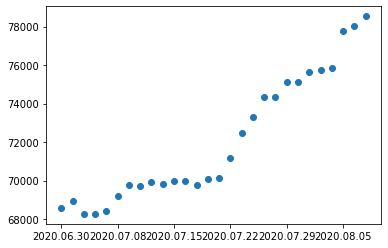

In [25]:
import matplotlib.pyplot as plt
plt.scatter(df['일자'], df['금값'])
# plt.scatter(df['일자'], df['은값'])
# plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].loc[range(27,-1,-5)])
plt.show()

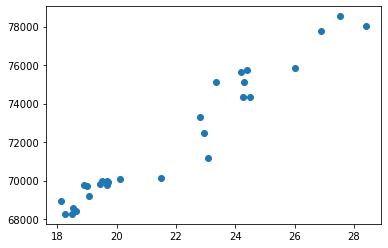

In [23]:
plt.scatter(df['은값'], df['금값'])
plt.show()

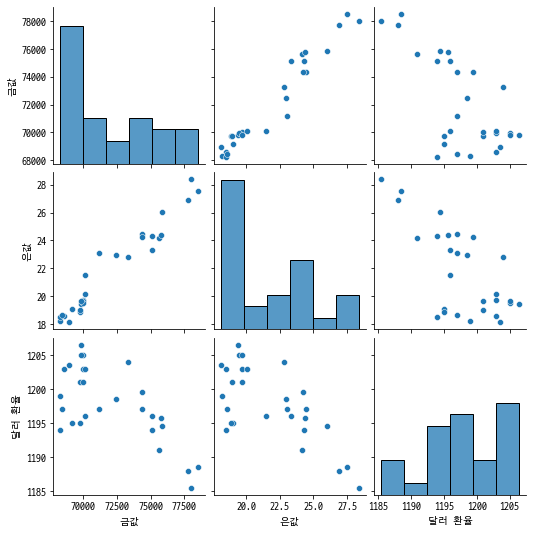

In [29]:
import seaborn as sns
# 한글 처리
from matplotlib import font_manager, rc
# fm = font_manager.FontProperties(fname='C:\Windows\Fonts\HMFMPYUN.TTF')
# rc('font', family=fm.get_name())
rc('font', family='D2Coding')

# 한꺼번에 그래프를 그려줌
sns.pairplot(df)
plt.show()

In [30]:
# 피어슨 상관계수 (상관계수, pvalue)
sp.stats.pearsonr(df['금값'], df['은값'])

(0.9718640116033497, 7.508878356556937e-18)

In [31]:
sp.stats.pearsonr(df['금값'], df['달러 환율'])

(-0.6793266264341937, 7.033325258452259e-05)

In [32]:
sp.stats.pearsonr(df['은값'], df['달러 환율'])

(-0.695456955620356, 3.9890420619579605e-05)

In [33]:
df.corr()

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


<AxesSubplot:>

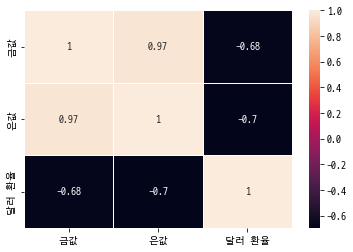

In [37]:
# -(마이너스기호)가 깨질때
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
sns.heatmap(df.corr(), annot=True, linewidths=1)

In [38]:
# 스피어만 상관계수
df.corr(method='spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000


In [39]:
# 피어슨 상관계수 : 두변수의 공분산/두변수의 분산의 곱을 제곱근 (연속형 변수)
# 스피어만 상관계수 : 피어슨과 유사하지만 서열형(순서)에서도 가능함
# 둘다 선형관계에서만 가능

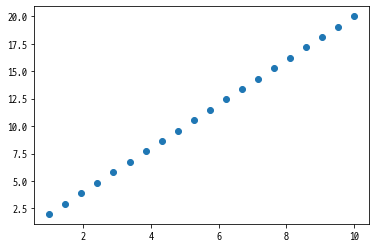

In [45]:
x = np.linspace(1, 10, 20)
y = x*2
plt.scatter(x, y)
plt.show()

In [46]:
sp.stats.pearsonr(x,y), sp.stats.spearmanr(x,y)

((0.9999999999999999, 2.4335320021950577e-142),
 SpearmanrResult(correlation=1.0, pvalue=0.0))

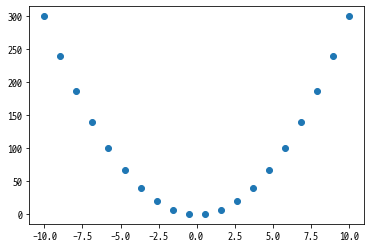

In [52]:
x = np.linspace(-10, 10, 20)
y = 3*x**2
plt.scatter(x, y)
plt.show()

In [54]:
# 상관관계가 분명히 있는데 상관계수는 둘다 0
# ** 그래서 그래프를 반드시 확인할 것!
sp.stats.pearsonr(x,y), sp.stats.spearmanr(x,y)

((-8.326672684688674e-17, 0.9999999999999976),
 SpearmanrResult(correlation=-0.040662696716141415, pvalue=0.8648452708108127))